In [7]:
from google.colab import files
files.download('temperature_clothing.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
df = pd.read_csv('temperature_clothing.csv')
df.head()


,temperature,clothing
0,10,Jacket
1,19,Long Sleeve
2,19,Long Sleeve
3,32,Shorts
4,6,Jacket


In [16]:
# Install seaborn if not available
!pip install seaborn --quiet

import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [19]:
def generate_noisy_labels(temps, noise_ratio=0.1):
    clothing = []
    options = ['Heavy Jacket', 'Jacket', 'Sweater', 'Long Sleeve', 'T-Shirt', 'Shorts']

    for temp in temps:
        label = recommender.get_clothing(temp)
        if random.random() < noise_ratio:
            label = random.choice([l for l in options if l != label])
        clothing.append(label)

    return clothing


In [20]:
class ClothingRecommender:
    def __init__(self, num_samples=200):
        self.num_samples = num_samples
        self.df = None
        self.label_encoder = LabelEncoder()
        self.model = DecisionTreeClassifier()

    def get_clothing(self, temp):
        if temp <= 5:
            return 'Heavy Jacket'
        elif temp <= 10:
            return 'Jacket'
        elif temp <= 15:
            return 'Sweater'
        elif temp <= 20:
            return 'Long Sleeve'
        elif temp <= 30:
            return 'T-Shirt'
        else:
            return 'Shorts'

    def generate_data(self):
        temperatures = [random.randint(0, 40) for _ in range(self.num_samples)]
        clothing = generate_noisy_labels(temperatures, noise_ratio=0.1)  # Use noisy labels here
        self.df = pd.DataFrame({'temperature': temperatures, 'clothing': clothing})
        self.df.to_csv("temperature_clothing.csv", index=False)
        print("✅ Noisy data generated and saved to CSV.")


    def load_data(self):
        self.df = pd.read_csv("temperature_clothing.csv")
        print("✅ Data loaded successfully.")
        return self.df.head()

    def visualize_data(self):
        plt.figure(figsize=(10, 5))
        sns.countplot(data=self.df, x='clothing', order=self.df['clothing'].value_counts().index, palette='viridis')
        plt.title("👕 Clothing Frequency Based on Temperature")
        plt.xticks(rotation=45)
        plt.show()

    def preprocess(self):
        self.df['clothing_encoded'] = self.label_encoder.fit_transform(self.df['clothing'])
        X = self.df[['temperature']]
        y = self.df['clothing_encoded']
        return train_test_split(X, y, test_size=0.2, random_state=42)

    def train_model(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        print("✅ Model trained.")

    def evaluate_model(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print("🔍 Model Evaluation")
        print("Accuracy:", round(acc * 100, 2), "%")

        print("\n📊 Classification Report:")
        print(classification_report(y_test, y_pred, target_names=self.label_encoder.classes_))

        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.label_encoder.classes_)
        disp.plot(cmap='Blues', xticks_rotation=45)
        plt.title("Confusion Matrix")
        plt.grid(False)
        plt.show()

    def predict_clothing(self, temp):
        temp_df = pd.DataFrame({'temperature': [temp]})
        encoded = self.model.predict(temp_df)
        clothing = self.label_encoder.inverse_transform(encoded)
        return clothing[0]


✅ Noisy data generated and saved to CSV.
✅ Data loaded successfully.


/tmp/ipython-input-20-1574512996.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.df, x='clothing', order=self.df['clothing'].value_counts().index, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128085 (\N{T-SHIRT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


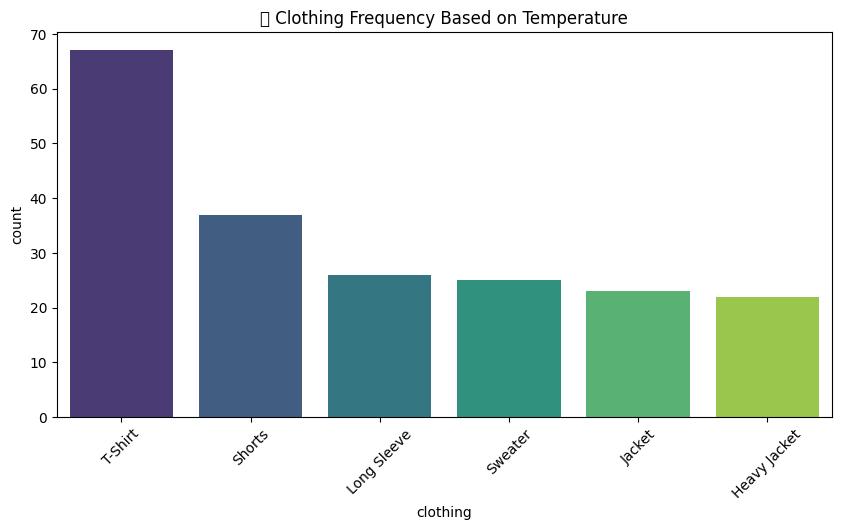

✅ Model trained.
🔍 Model Evaluation
Accuracy: 92.5 %

📊 Classification Report:
              precision    recall  f1-score   support

Heavy Jacket       1.00      0.83      0.91         6
      Jacket       0.67      1.00      0.80         4
 Long Sleeve       1.00      1.00      1.00         7
      Shorts       0.86      1.00      0.92         6
     Sweater       1.00      0.67      0.80         6
     T-Shirt       1.00      1.00      1.00        11

    accuracy                           0.93        40
   macro avg       0.92      0.92      0.91        40
weighted avg       0.95      0.93      0.92        40



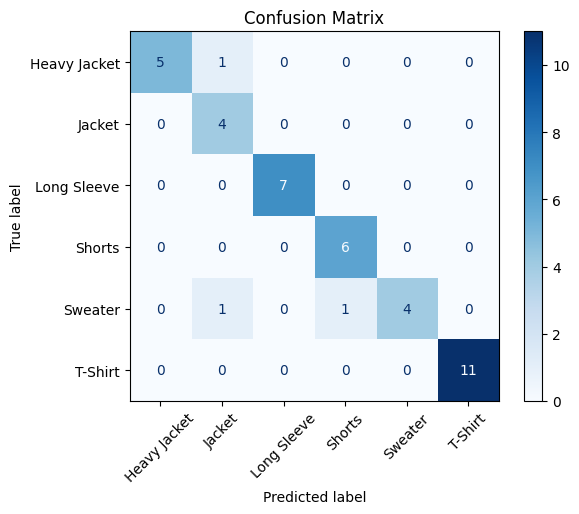

👕 For 18°C: Long Sleeve
👕 For 6°C: Jacket
👕 For 35°C: Shorts


In [21]:
recommender = ClothingRecommender(num_samples=200)

# Step-by-step execution
recommender.generate_data()
recommender.load_data()
recommender.visualize_data()

# Model training
X_train, X_test, y_train, y_test = recommender.preprocess()
recommender.train_model(X_train, y_train)
recommender.evaluate_model(X_test, y_test)

# Make predictions
print("👕 For 18°C:", recommender.predict_clothing(18))
print("👕 For 6°C:", recommender.predict_clothing(6))
print("👕 For 35°C:", recommender.predict_clothing(35))
